# BIS557 HW4

**Question 1**

In Python, implement a numerically-stable ridge regression that takes into account colinear (or nearly colinear) regression variables. 

In [77]:
import numpy as np
import pandas as pd
import statsmodels as sm
from scipy.linalg import svd
from scipy.linalg import solve
from sklearn.datasets import load_iris 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [69]:
def ridge(X, Y, lamb):
    U, S, V = svd(X,full_matrices=False)
    sigma = np.diag(S)
    lambda_I = np.diag(np.repeat(lamb, len(S)))
    beta = V.transpose() @ np.linalg.solve(sigma**2,lambda_I)*100 @ sigma @ U.transpose() @ Y

    return lamb, beta

In [70]:
#example 
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = df.iloc[:,0:3]
y = df["target"]

ridge(X, y, 0.01)

(0.01, array([-0.23178751,  0.09881172,  0.54603559]))

**Question 2**

Create an "out-of-core" implementation of the linear model that reads in contiguous rows of a data frame from a file, updates the model. You may read the data from R and send it to your Python functions for fitting.

In [71]:
#define X and y for loop
X = np.random.randint(0, 100, size=(2000, 10)) 
y = X @ np.array([1,2,3,4,5,6,7,8,9,10]) + np.random.normal(0, 1, 2000)

In [72]:
#linear model that reads in contiguous rows from a dataframe
for i in np.arange(1, 2000):
    X1 = X[0:i,:]
    y1 = y[0:i]
    model = LinearRegression().fit(X1, y1)

**Question 3**

Implement your own LASSO regression function in Python. Show that the results are the same as the function implemented in the casl package.  
ref: https://xavierbourretsicotte.github.io/lasso_implementation.html

In [73]:
def soft_threshold(r,lamb):
    if r < - lamb:
        return (r + lamb)
    elif r >  lamb:
        return (r - lamb)
    else: 
        return 0

In [74]:
def lasso_reg(theta,X,y,lamb = .01, niters=100, intercept = False):
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0))
    
    #Looping until the number of iterations
    for i in range(niters): 
        
        #Looping through each coordinate
        for j in range(n):
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamb)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamb)   
            
    return theta.flatten()
    

test the LASSO regression

(0.06309573444801933, 1584.893192461114, -849.8147108555941, 820.6104516733533)

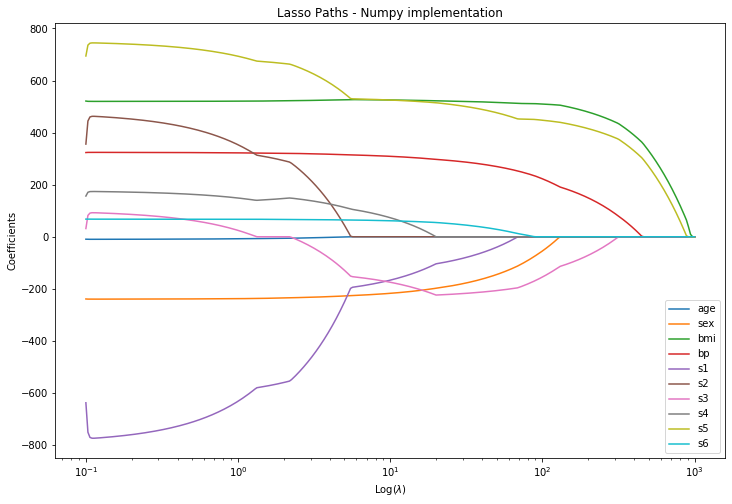

In [78]:
# Initialize variables
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1)
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values


#Run lasso regression for each lambda
for l in lamda:
    theta = lasso_reg(initial_theta, X,y,lamb = l,  niters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T


#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')
